In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np

In [3]:
df = pd.read_csv("combined_wine_quality.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [5]:
# Calculate the median for each feature as a classification threshold
alcohol_threshold = df['alcohol'].median()
ph_threshold = df['pH'].median()
volatile_acidity_threshold = df['volatile acidity'].median()

# Define classification function covering all combinations
def classify_wine(row):
    if row['alcohol'] > alcohol_threshold and row['pH'] <= ph_threshold and row['volatile acidity'] <= volatile_acidity_threshold:
        return 'High Alc-Low pH-Low Acid'
    elif row['alcohol'] <= alcohol_threshold and row['pH'] <= ph_threshold and row['volatile acidity'] > volatile_acidity_threshold:
        return 'Low Alc-Low pH-High Acid'
    elif row['alcohol'] > alcohol_threshold and row['pH'] > ph_threshold and row['volatile acidity'] <= volatile_acidity_threshold:
        return 'High Alc-High pH-Low Acid'
    elif row['alcohol'] > alcohol_threshold and row['pH'] <= ph_threshold and row['volatile acidity'] > volatile_acidity_threshold:
        return 'High Alc-Low pH-High Acid'
    elif row['alcohol'] <= alcohol_threshold and row['pH'] > ph_threshold and row['volatile acidity'] <= volatile_acidity_threshold:
        return 'Low Alc-High pH-Low Acid'
    elif row['alcohol'] <= alcohol_threshold and row['pH'] > ph_threshold and row['volatile acidity'] > volatile_acidity_threshold:
        return 'Low Alc-High pH-High Acid'
    elif row['alcohol'] <= alcohol_threshold and row['pH'] <= ph_threshold and row['volatile acidity'] <= volatile_acidity_threshold:
        return 'Low Alc-Low pH-Low Acid'
    else:
        return 'High Alc-High pH-High Acid'

# add classification column
df['category'] = df.apply(classify_wine, axis=1)

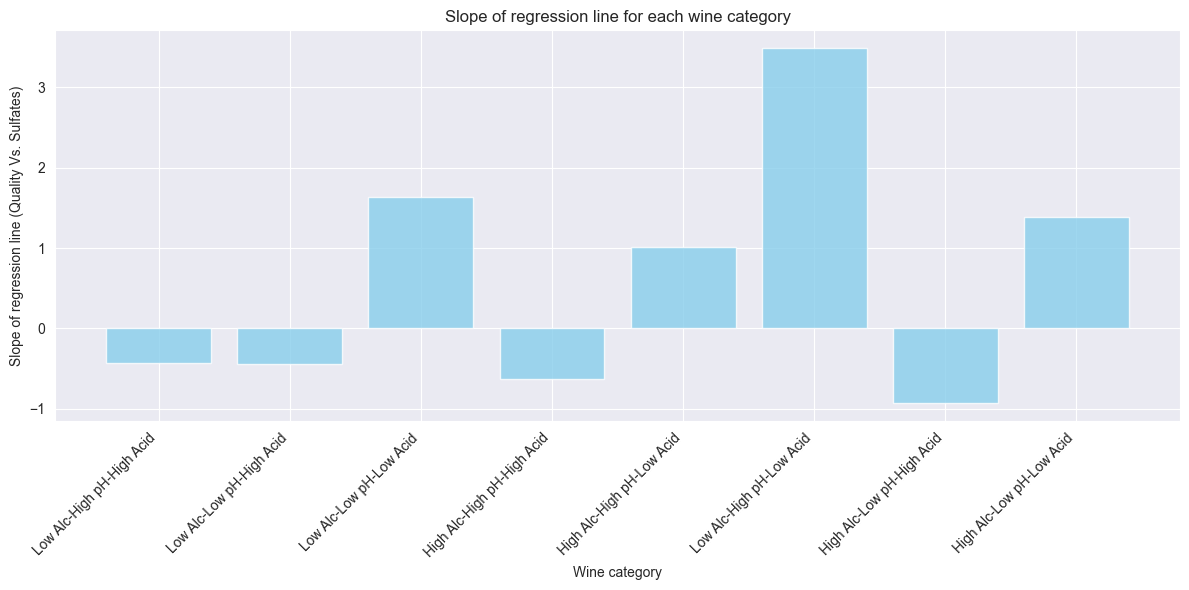

In [7]:
slopes = {}
for category in df['category'].unique():
    mask = (df['category'] == category) & (df['sulphates'] > 0.75)
    if sum(mask) > 1:
        X = df[mask]['sulphates'].values.reshape(-1, 1)
        y = df[mask]['quality'].values
        reg = LinearRegression().fit(X, y)
        slopes[category] = reg.coef_[0]
        
# Plot bar chart of slopes for each category using simplified colors
plt.figure(figsize=(12, 6))

# Use a single color with varying transparency for each category
base_color = 'skyblue'
plt.bar(slopes.keys(), slopes.values(), color=[base_color for _ in slopes.keys()], alpha=0.8)

plt.xticks(rotation=45, ha='right')
plt.xlabel('Wine category')
plt.ylabel('Slope of regression line')
plt.title('Slope of regression line for each wine category')
plt.tight_layout()

# Save the bar chart as a static image
plt.savefig('slopes_bar_chart.png')
plt.show()